# Tampa Real-Estate Recommender
## Feature Engineering
TB Real Estate Corporation is a real estate investment firm in the Tampa Bay, Florida area.  The real estate market in the Tampa Bay area is very active.  Single family homes are selling quickly.  TB Real Estate Corporation needs to be able to assess the value of homes coming onto the market quickly and accurately so that they can beat the competition in making a competitive offer.   They need to be able to evaluate the listing price against the predicted sale price in order to identify properties that may be priced below market value and would make good investments.  
<br>
The objective of the Feature Engineering is to prepare the features and to build training and testing datasets to optimally support the machine learning models in order to predict the sales price for residential properties.

# 1 Imports and File Locations<a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
ext_data = '../data/external/'
raw_data = '../data/raw/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

# 2 Read Sales data into dataframe<a id='2'></a>

In [3]:
df = pd.read_csv(interim_data + 'sales_df_EDA.csv', dtype={'FOLIO': object, 'DOR_CODE': object, 'NBHC': object, 'SECTION_CD': object, 'TOWNSHIP_CD': object, 'RANGE_CD': object}, parse_dates=['S_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FOLIO            20881 non-null  object        
 1   S_DATE           20881 non-null  datetime64[ns]
 2   S_AMT            20881 non-null  float64       
 3   SITE_ADDR        20879 non-null  object        
 4   SITE_CITY        20880 non-null  object        
 5   SITE_ZIP         20881 non-null  object        
 6   tBEDS            20881 non-null  float64       
 7   tBATHS           20881 non-null  float64       
 8   JUST             20881 non-null  float64       
 9   HEAT_AR          20881 non-null  float64       
 10  SD1              20881 non-null  object        
 11  SD2              20881 non-null  object        
 12  TIF              20881 non-null  object        
 13  ACREAGE          20881 non-null  float64       
 14  NBHC             20881 non-null  objec

# 4 Feature Engineering<a id='4'></a>

In [4]:
# Replace S_DATE with integer sales date epoch
df['sales_date_epoch'] = (df['S_DATE'] - dt.datetime(1970,1,1)).dt.days

In [5]:
county_map = {1: 'South_Tampa',
              2: 'South_Tampa',
              3: 'South_Tampa',
              4: 'Tampa',
              5: 'Tampa',
              6: 'Tampa',
              7: 'Tampa',
              8: 'Tampa',
              9: 'Northwest',
              10: 'Northwest',
              11: 'Northwest',
              12: 'Northern',
              13: 'Northern',
              14: 'Northern',
              15: 'Northern',
              16: 'Northern',
              17: 'Northern',
              18: 'Northeast',
              19: 'Northeast',
              20: 'Northeast',
              21: 'Northeast',
              22: 'East_Bay',
              23: 'Eastern',
              24: 'Eastern',
              25: 'Eastern',
              26: 'Eastern',
              27: 'East_Bay',
              28: 'Southern',
              29: 'Southern'
             }

In [6]:
df['COUNTY_SECT'] = df['MARKET_AREA_CD'].map(county_map)

In [7]:
# Extract independent feature variables to X
features = ['sales_date_epoch', 'AGE', 'tBEDS', 'tBATHS', 'COUNTY_SECT', 'JUST', 'HEAT_AR', 'ACREAGE']
X = df[features] 

In [8]:
# One-hot encode the County Section
X = pd.get_dummies(X, columns=['COUNTY_SECT'], prefix=['LOC'])

In [9]:
# Extract target dependent variable to y
y = df.S_AMT

In [10]:
# Call train_test_split on X, y. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16704, 15) (16704,)
(4177, 15) (4177,)


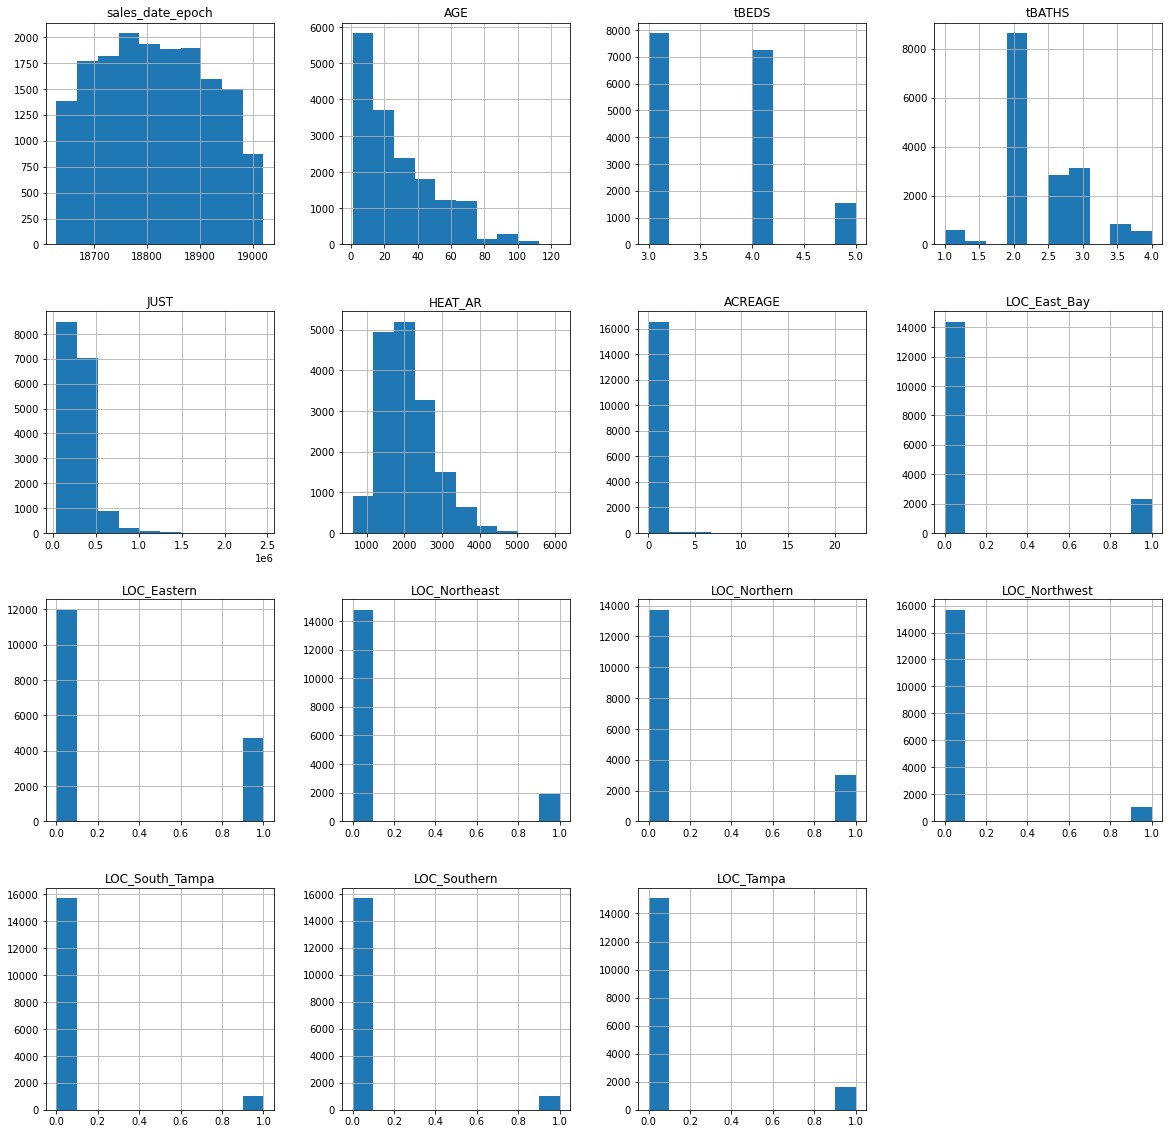

In [18]:
X_train.hist(figsize=(20, 20))
plt.show()

In [19]:
# Save unscaleddata to interim data folder as csv files
X_train.to_csv(interim_data + 'X_train.csv', index=False)
X_test.to_csv(interim_data + 'X_test.csv', index=False)
y_train.to_csv(interim_data + 'y_train.csv', index=False)
y_test.to_csv(interim_data + 'y_test.csv', index=False)

# 5 Scale Features<a id='5'></a>

In [20]:
# Apply a standard scaler to the training data
SS_scaler = StandardScaler()
SS_scaler.fit(X_train)
X_train_scaled = SS_scaler.transform(X_train)

In [21]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_train_scaled.head()

,sales_date_epoch,AGE,tBEDS,tBATHS,JUST,HEAT_AR,ACREAGE,LOC_East_Bay,LOC_Eastern,LOC_Northeast,LOC_Northern,LOC_Northwest,LOC_South_Tampa,LOC_Southern,LOC_Tampa
0,0.532223,-0.292672,0.582354,-0.605798,-0.173419,0.113994,-0.136944,-0.400805,1.587791,-0.362281,-0.466837,-0.257407,-0.253149,-0.258067,-0.329283
1,1.425055,-0.417149,-0.956586,-0.605798,1.150948,1.044681,-0.244117,-0.400805,-0.629806,-0.362281,-0.466837,3.884905,-0.253149,-0.258067,-0.329283
2,1.628854,-1.039533,-0.956586,-0.605798,-0.625759,-0.903268,-0.199587,-0.400805,-0.629806,-0.362281,-0.466837,-0.257407,-0.253149,3.874963,-0.329283
3,0.444881,1.532989,0.582354,0.212713,-0.245996,0.356406,0.029738,-0.400805,-0.629806,-0.362281,2.142076,-0.257407,-0.253149,-0.258067,-0.329283
4,0.425472,-0.417149,2.121293,1.849733,0.588946,3.046019,-0.184433,-0.400805,-0.629806,-0.362281,2.142076,-0.257407,-0.253149,-0.258067,-0.329283


In [22]:
X_test_scaled = SS_scaler.transform(X_test)

In [23]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)
X_test_scaled.head()

,sales_date_epoch,AGE,tBEDS,tBATHS,JUST,HEAT_AR,ACREAGE,LOC_East_Bay,LOC_Eastern,LOC_Northeast,LOC_Northern,LOC_Northwest,LOC_South_Tampa,LOC_Southern,LOC_Tampa
0,0.609861,-0.417149,-0.956586,-0.605798,-0.679415,-0.725788,-0.304223,2.494978,-0.629806,-0.362281,-0.466837,-0.257407,-0.253149,-0.258067,-0.329283
1,1.046572,-0.873564,0.582354,-0.605798,-0.384048,-0.324655,-0.168745,2.494978,-0.629806,-0.362281,-0.466837,-0.257407,-0.253149,-0.258067,-0.329283
2,1.163029,1.532989,-0.956586,0.212713,0.291374,0.142853,-0.140544,-0.400805,-0.629806,-0.362281,-0.466837,-0.257407,-0.253149,-0.258067,3.036901
3,-0.147105,-0.956548,0.582354,1.031223,0.937912,0.402579,-0.283149,-0.400805,-0.629806,-0.362281,-0.466837,-0.257407,3.950237,-0.258067,-0.329283
4,0.338129,2.279851,-0.956586,1.031223,1.078239,-0.164490,-0.020316,-0.400805,-0.629806,-0.362281,-0.466837,-0.257407,-0.253149,-0.258067,3.036901


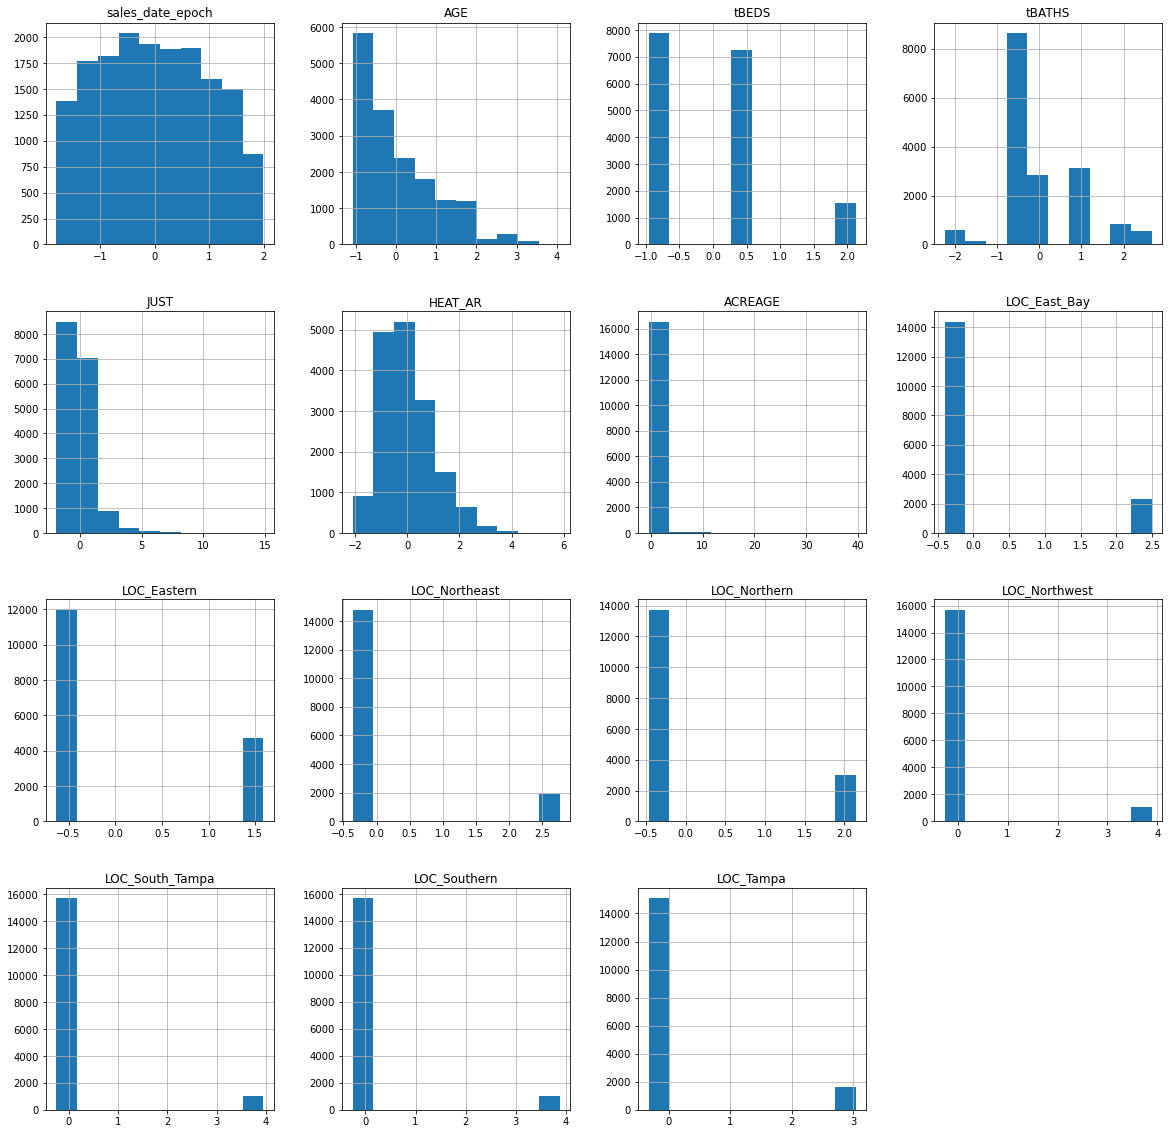

In [24]:
X_train_scaled.hist(figsize=(20, 20))
plt.show()

In [25]:
# Save unscaled data to interim data folder as csv files
X_train_scaled.to_csv(interim_data + 'X_train_scaled.csv', index=False)
X_test_scaled.to_csv(interim_data + 'X_test_scaled.csv', index=False)